# Name: Shital Ashok Gaikwad

# Project Name:-Laptop_Price_Prediction

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset=pd.read_csv(r"C:\Users\shita\Downloads\laptop.csv",encoding="latin-1")
dataset

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# Delete unwanted data from dataset

In [3]:
del(dataset["laptop_ID"])

In [4]:
dataset

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# Finding null values 

In [5]:
dataset.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

There is no null values present in the dataset

# Data Preprocessing

In [6]:
dataset["Ram"]=dataset["Ram"].str.replace("GB","")
dataset["Weight"]=dataset["Weight"].str.replace("kg","")
dataset["Ram"]=dataset["Ram"].astype(int)
dataset["Weight"]=dataset["Weight"].astype(float)

# Convert string into numeric data

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
dataset["Company"]=le.fit_transform(dataset["Company"])
dataset["Product"]=le.fit_transform(dataset["Product"])
dataset["TypeName"]=le.fit_transform(dataset["TypeName"])
dataset["ScreenResolution"]=le.fit_transform(dataset["ScreenResolution"])
dataset["Cpu"]=le.fit_transform(dataset["Cpu"])
dataset["Memory"]=le.fit_transform(dataset["Memory"])
dataset["Gpu"]=le.fit_transform(dataset["Gpu"])
dataset["OpSys"]=le.fit_transform(dataset["OpSys"])

<Figure size 720x360 with 0 Axes>

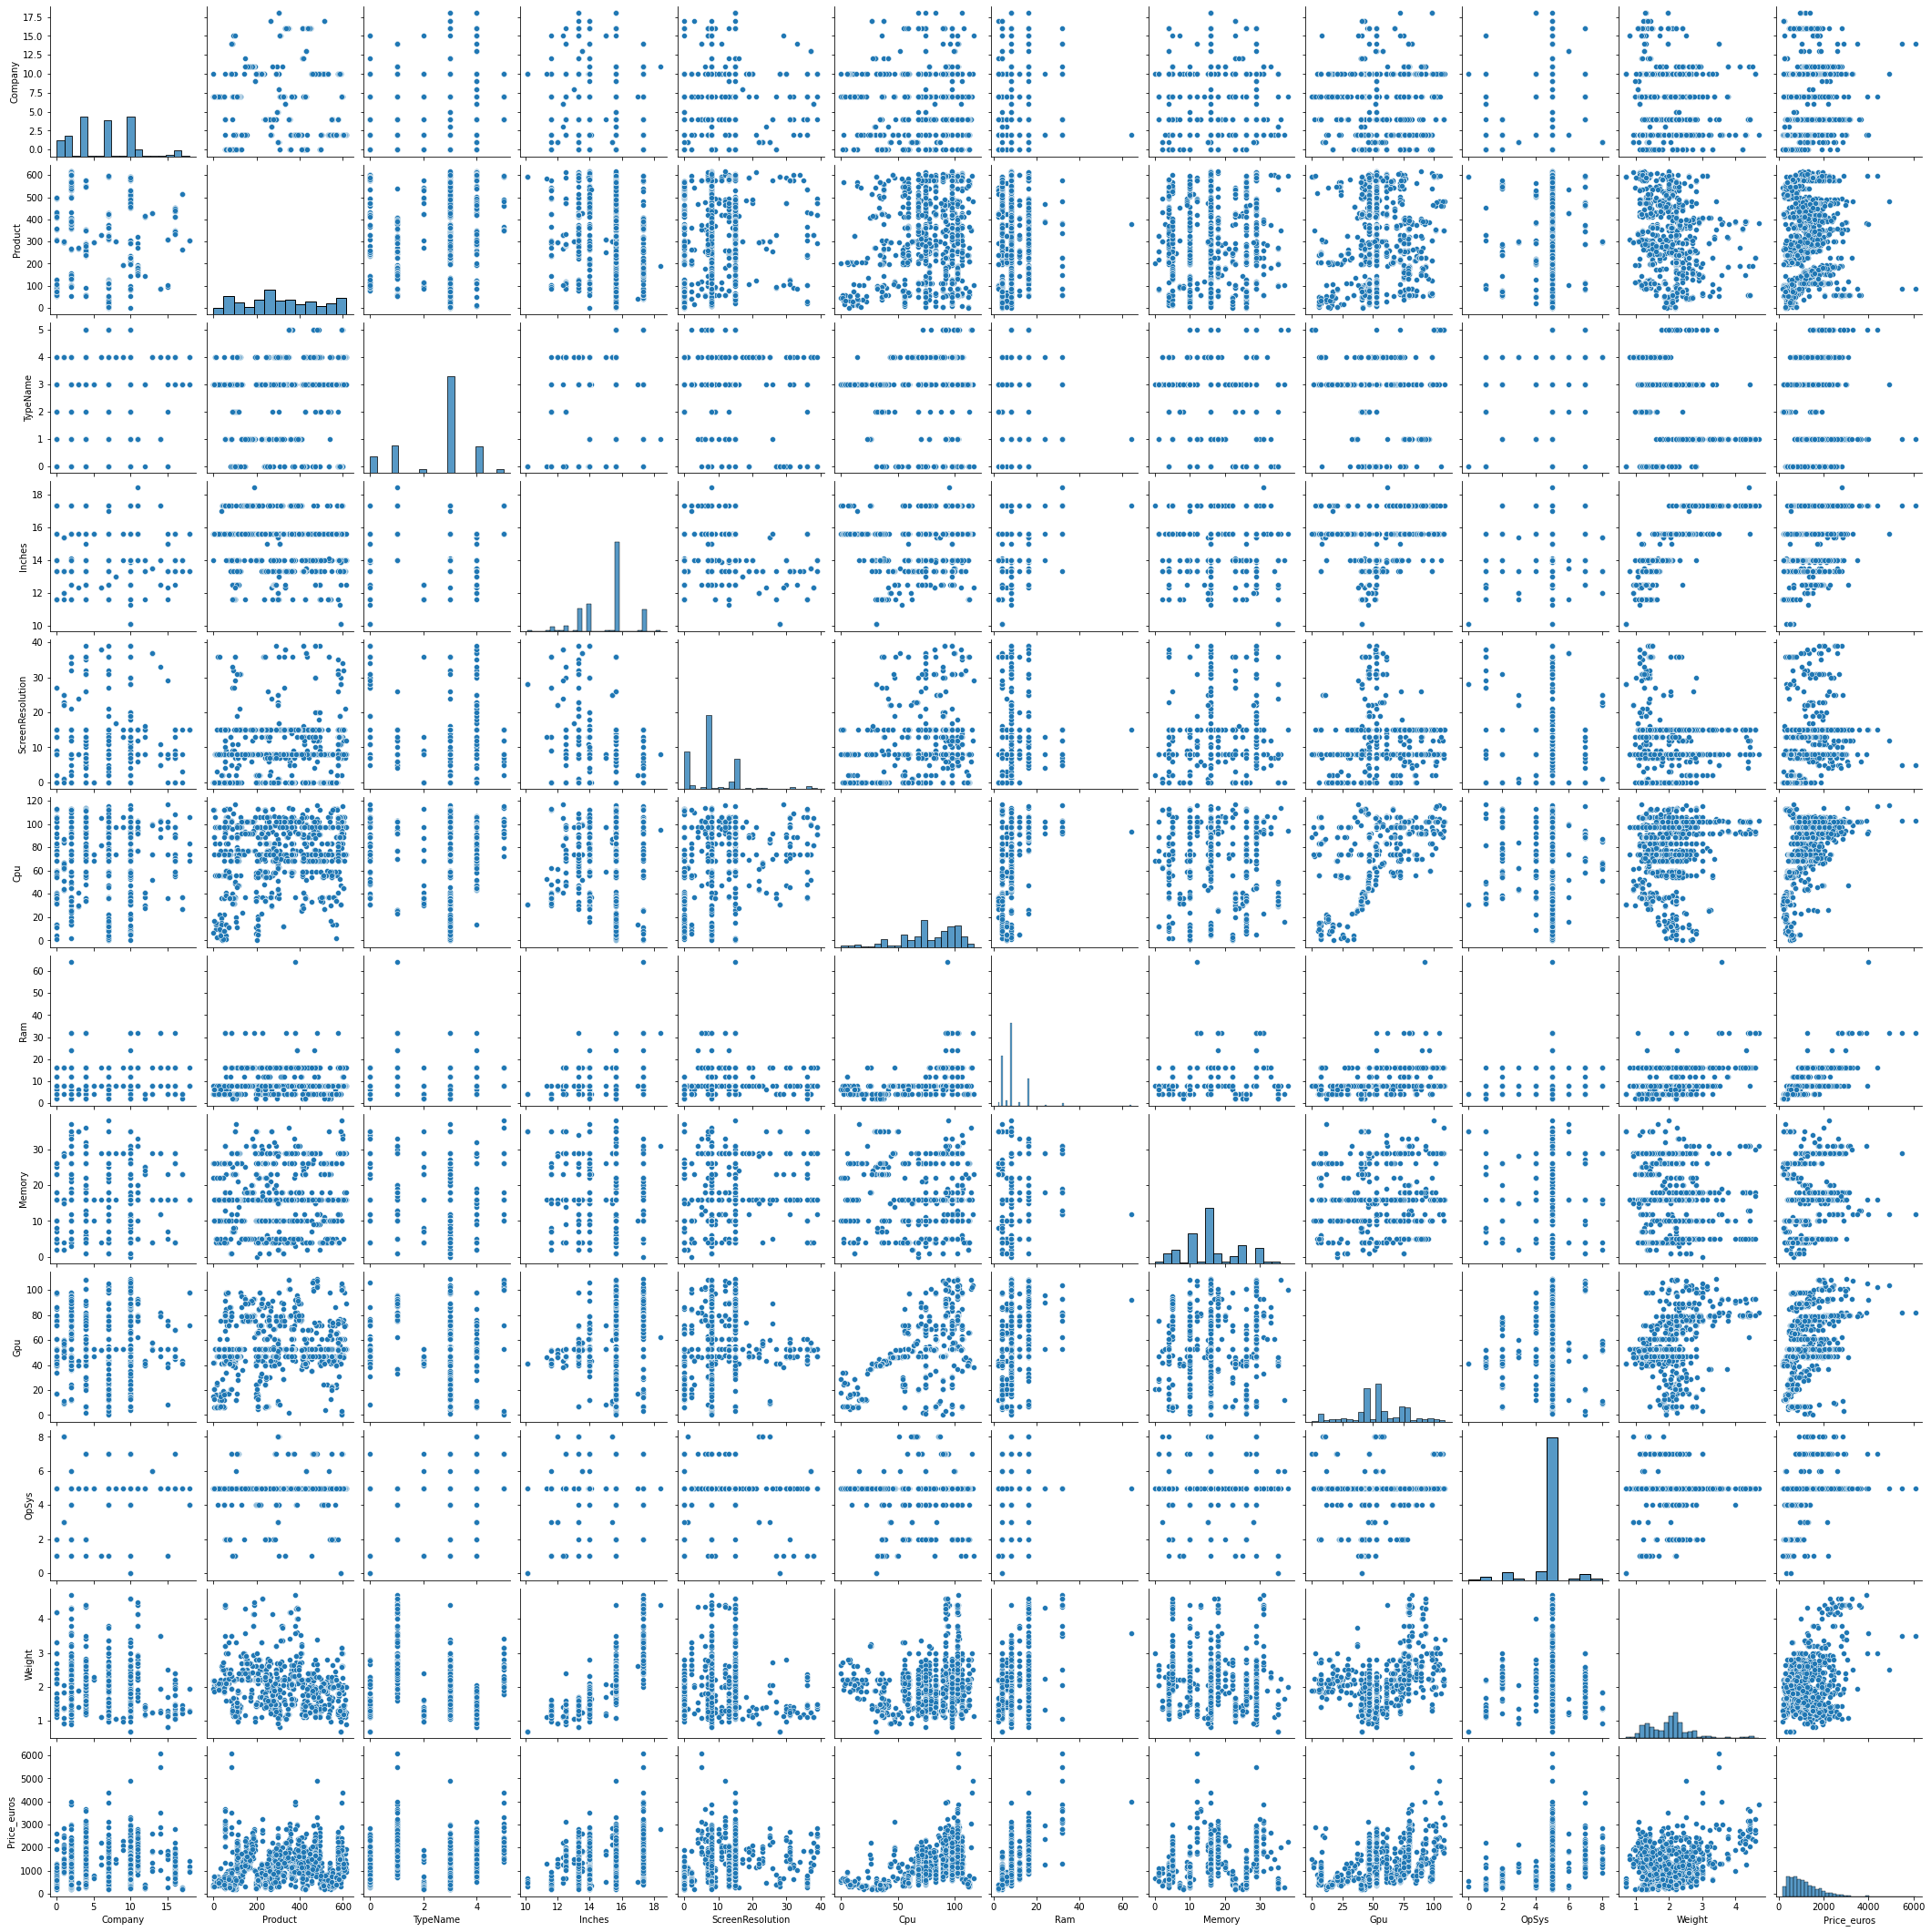

In [9]:
plt.figure(figsize=(10,5))
sns.pairplot(dataset)

# Convert all independent data into one level because in our dataset we have some categorical,some continuous data so we need to convert them into one level.

# To Check outliers for each column

C:\Users\shita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Company'>

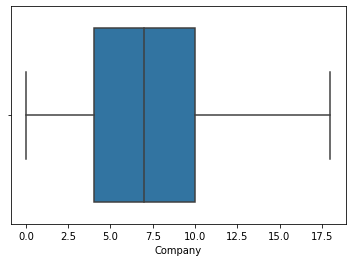

In [10]:
sns.boxplot(dataset["Company"])

C:\Users\shita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product'>

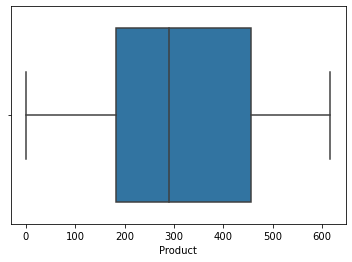

In [11]:
sns.boxplot(dataset["Product"])

C:\Users\shita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TypeName'>

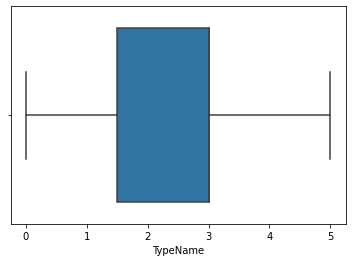

In [12]:
sns.boxplot(dataset["TypeName"])

C:\Users\shita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ScreenResolution'>

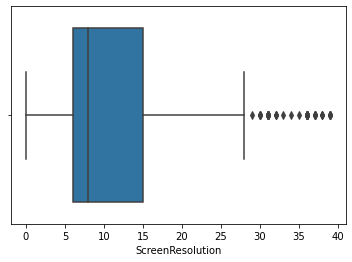

In [13]:
sns.boxplot(dataset["ScreenResolution"])

C:\Users\shita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cpu'>

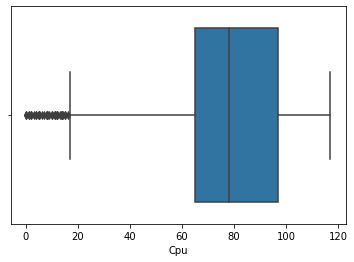

In [14]:
sns.boxplot(dataset["Cpu"])

C:\Users\shita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inches'>

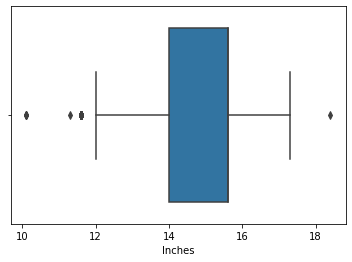

In [15]:
sns.boxplot(dataset["Inches"])

C:\Users\shita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu'>

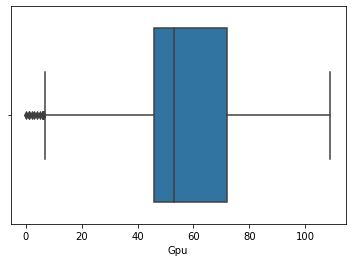

In [16]:
sns.boxplot(dataset["Gpu"])

C:\Users\shita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

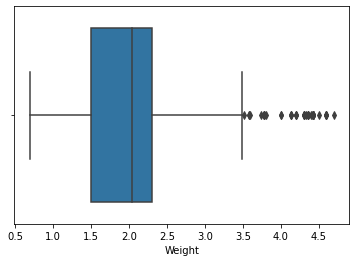

In [17]:
sns.boxplot(dataset["Weight"])

C:\Users\shita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_euros'>

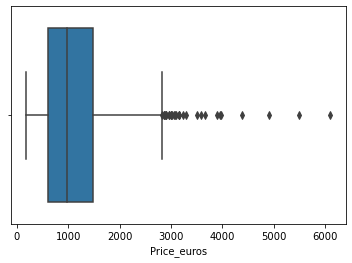

In [18]:
sns.boxplot(dataset["Price_euros"])

# Above Graph shows in our dataset we have an too  much outliers.So we need to use Robust Scaler for data normalization.

# Data Normalization

In [19]:
#Indepedent data normalization

In [20]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [21]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
RS=rs.fit_transform(x)

In [22]:
sg=pd.DataFrame(RS)
sg

,0,1,2,3,4,5,6,7,8,9,10
0,-1.000000,0.032967,0.666667,-1.4375,1.666667,-0.40625,0.0,-0.923077,0.192308,3.0,-0.8375
1,-1.000000,0.036630,0.666667,-1.4375,-0.777778,-0.46875,0.0,-1.076923,-0.076923,3.0,-0.8750
2,0.000000,-0.882784,0.000000,0.0000,0.000000,-0.12500,0.0,0.000000,0.000000,-1.0,-0.2250
3,-1.000000,0.032967,0.666667,-0.1250,1.888889,0.21875,2.0,1.000000,-1.692308,3.0,-0.2625
4,-1.000000,0.032967,0.666667,-1.4375,1.666667,-0.34375,0.0,0.000000,0.230769,3.0,-0.8375
...,...,...,...,...,...,...,...,...,...,...,...
1298,0.500000,1.058608,-2.000000,-1.0000,0.555556,0.34375,-1.0,-0.923077,-0.230769,0.0,-0.3000
1299,0.500000,1.087912,-2.000000,-1.4375,1.222222,0.34375,2.0,1.000000,-0.230769,0.0,-0.9250
1300,0.500000,-0.347985,0.000000,-1.0000,-0.888889,-1.37500,-1.5,1.461538,-0.500000,0.0,-0.6750
1301,0.000000,-1.058608,0.000000,0.0000,-0.888889,0.34375,-0.5,-0.461538,-1.230769,0.0,0.1875


In [23]:
# Normalization of independent column

C:\Users\shita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


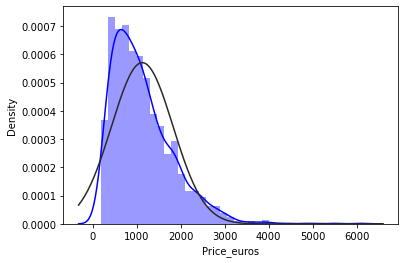

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(a=dataset["Price_euros"],fit=norm,color="blue")
plt.show()

# To convert the target value into normal data we have 3 methods 

1) Log Transformation
2) Square Root Transformation
3) Box-Cox Transformation

# 1) Log Transformation

In [25]:
trs_dataset=np.log(dataset["Price_euros"])

In [26]:
from scipy.stats import skew,kurtosis,boxcox

In [27]:
skew(trs_dataset)

-0.17392921328627067

In [28]:
kurtosis(trs_dataset,fisher=False)

2.531745334197979

C:\Users\shita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

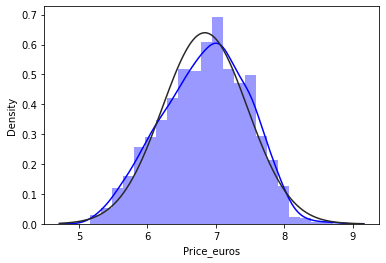

In [29]:
sns.distplot(a=trs_dataset,fit=norm,color="blue")

# 2)Square Root Transformation

In [30]:
trs_dataset1=np.sqrt(dataset["Price_euros"])

In [31]:
skew(trs_dataset1)

0.5676354128116943

In [32]:
kurtosis(trs_dataset1,fisher=False)

3.2904228206401305

C:\Users\shita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

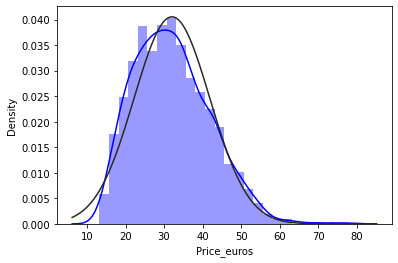

In [33]:
sns.distplot(a=trs_dataset1,fit=norm,color="blue")

# 3) Box-Cox Transformation

In [34]:
trs_dataset2=boxcox(dataset["Price_euros"],lmbda=0)

In [35]:
skew(trs_dataset2)

-0.17392921328627067

In [36]:
kurtosis(trs_dataset2,fisher=False)

2.531745334197979

C:\Users\shita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

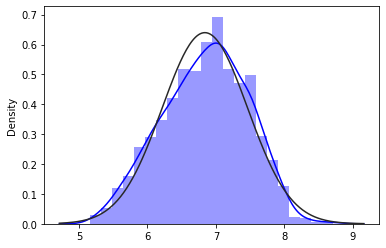

In [37]:
sns.distplot(a=trs_dataset2,fit=norm,color="blue")

# Here we convert Non Gaussion data into normal for the making predictions.By using 3 diffrent methods but Box-Cox method gives us best gaussian data for target value.

# Feature Selection

In [38]:
#Select normalized data to make predictions.

In [39]:
x=sg
y=trs_dataset2

# Model selection 

#####  Regession problem
#### 1)Linear Regression
#### 2)Random Forest Regressor

# 1)Lets check Linear Regression

In [40]:
# Now to check first assumptions of Linear Regression. 

#   Assumptions
###### 1)Data  should be linear.
######        2)No Multicollinearity.
######       3)Error should be normal.

# 1) Data should be linear.

In [41]:
sg[11]=trs_dataset2
sg

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.000000,0.032967,0.666667,-1.4375,1.666667,-0.40625,0.0,-0.923077,0.192308,3.0,-0.8375,7.200194
1,-1.000000,0.036630,0.666667,-1.4375,-0.777778,-0.46875,0.0,-1.076923,-0.076923,3.0,-0.8750,6.801216
2,0.000000,-0.882784,0.000000,0.0000,0.000000,-0.12500,0.0,0.000000,0.000000,-1.0,-0.2250,6.354370
3,-1.000000,0.032967,0.666667,-0.1250,1.888889,0.21875,2.0,1.000000,-1.692308,3.0,-0.2625,7.838915
4,-1.000000,0.032967,0.666667,-1.4375,1.666667,-0.34375,0.0,0.000000,0.230769,3.0,-0.8375,7.497540
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.500000,1.058608,-2.000000,-1.0000,0.555556,0.34375,-1.0,-0.923077,-0.230769,0.0,-0.3000,6.458338
1299,0.500000,1.087912,-2.000000,-1.4375,1.222222,0.34375,2.0,1.000000,-0.230769,0.0,-0.9250,7.312553
1300,0.500000,-0.347985,0.000000,-1.0000,-0.888889,-1.37500,-1.5,1.461538,-0.500000,0.0,-0.6750,5.433722
1301,0.000000,-1.058608,0.000000,0.0000,-0.888889,0.34375,-0.5,-0.461538,-1.230769,0.0,0.1875,6.638568


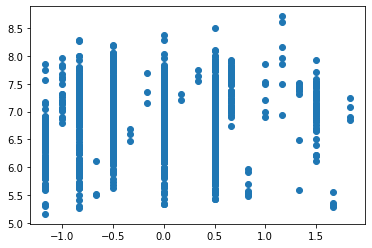

In [42]:
plt.scatter(sg[0],sg[11])

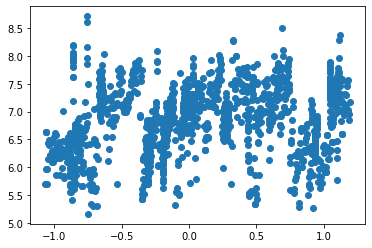

In [43]:
plt.scatter(sg[1],sg[11])

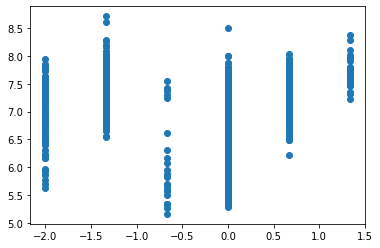

In [44]:
plt.scatter(sg[2],sg[11])

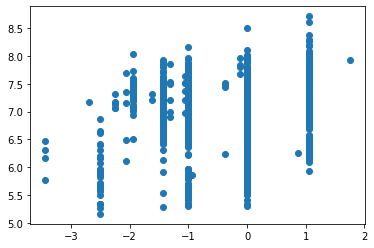

In [45]:
plt.scatter(sg[3],sg[11])

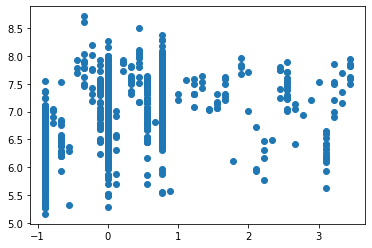

In [46]:
plt.scatter(sg[4],sg[11])

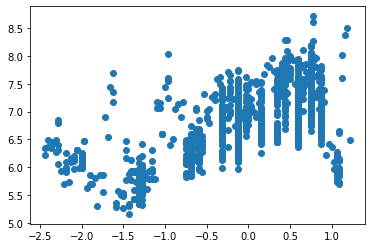

In [47]:
plt.scatter(sg[5],sg[11])

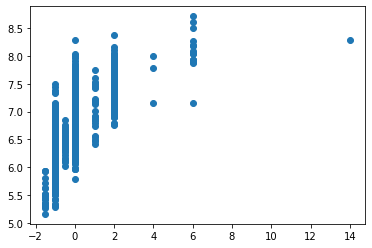

In [48]:
plt.scatter(sg[6],sg[11])

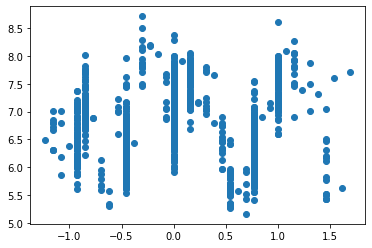

In [49]:
plt.scatter(sg[7],sg[11])

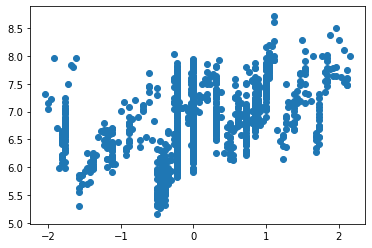

In [50]:
plt.scatter(sg[8],sg[11])

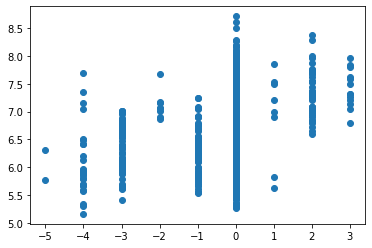

In [51]:
plt.scatter(sg[9],sg[11])

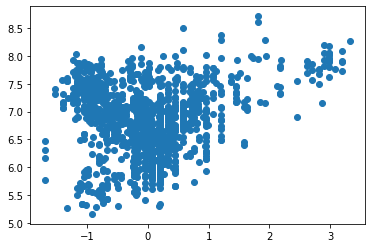

In [52]:
plt.scatter(sg[10],sg[11])

# Above scatter plot indicates given data is linear.

# 2)No Multicollinearity

In [53]:
b=sg.corr()
b

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.067234,-0.007718,-0.085784,0.094772,0.044593,0.046508,0.048086,0.026537,0.134290,-0.129610,0.142255
1,0.067234,1.000000,0.065594,-0.218974,0.176393,0.143855,0.019916,0.088667,0.094795,0.120562,-0.249029,0.184874
2,-0.007718,0.065594,1.000000,-0.077428,-0.175618,-0.128174,-0.242862,0.019091,-0.204774,0.085223,-0.267002,-0.125734
3,-0.085784,-0.218974,-0.077428,1.000000,-0.247841,0.153041,0.237993,-0.193382,0.215710,0.034528,0.827631,0.044329
4,0.094772,0.176393,-0.175618,-0.247841,1.000000,0.232751,0.238280,0.059042,0.160816,0.070360,-0.135653,0.392161
5,0.044593,0.143855,-0.128174,0.153041,0.232751,1.000000,0.468942,-0.013264,0.490761,0.125374,0.189229,0.632763
6,0.046508,0.019916,-0.242862,0.237993,0.238280,0.468942,1.000000,0.151801,0.393280,0.139367,0.383874,0.684803
7,0.048086,0.088667,0.019091,-0.193382,0.059042,-0.013264,0.151801,1.000000,-0.020784,0.035574,-0.167431,0.111280
8,0.026537,0.094795,-0.204774,0.215710,0.160816,0.490761,0.393280,-0.020784,1.000000,0.103853,0.336199,0.459801
9,0.134290,0.120562,0.085223,0.034528,0.070360,0.125374,0.139367,0.035574,0.103853,1.000000,0.006480,0.337220


<AxesSubplot:>

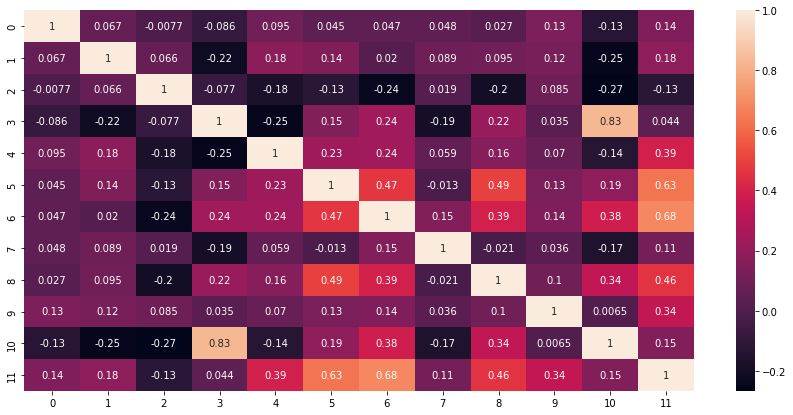

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(b,annot=True,fmt="1.2g")

* if vif>5==>Multicollinearity.
* if 1<vif<5==>Less Multicollinearity.
* if vif=1  ==>No Multicollinearity.


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
{sg.columns[i]:variance_inflation_factor(sg.values,i)
for i in range(1,sg.shape[1])}

{1: 1.161749797485454,
 2: 1.3579361823613185,
 3: 4.309747526338738,
 4: 1.2917625832843604,
 5: 1.5731335648966245,
 6: 1.7100046311363297,
 7: 1.1106514868753021,
 8: 1.5178433713104238,
 9: 1.1054432499916969,
 10: 4.373663143684039,
 11: 1.6146445344579088}

# In above result we can seen that their is no colinearity between columns.

# Error should be normal
#  Non Normal data

In [57]:
indep=sg.iloc[:,:-1]
dep=sg.iloc[:,-1]

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.2,random_state=1)

In [59]:
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
L1=l1.fit(x_train,y_train)

In [60]:
y_pred=l1.predict(x_test)

In [61]:
error=y_test-y_pred
error.mean()

0.00862894462879696

C:\Users\shita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


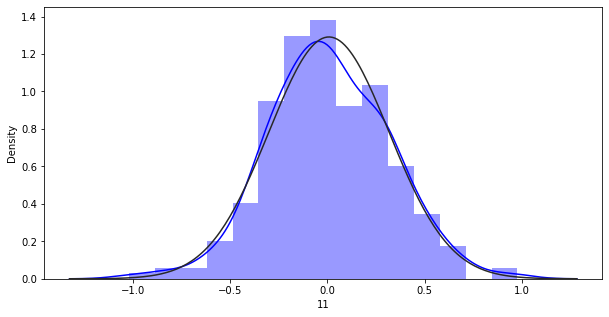

In [62]:
plt.figure(figsize=(10,5))
sns.distplot(error,fit=norm,color="blue")
plt.show()

# Model Evaluation & it's Performance.

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.24380214953973622


In [64]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

0.0955819392195906


In [65]:
from sklearn.metrics import r2_score
a=r2_score(y_test,y_pred)
print(a)

0.7390237521708335


In [66]:
L1.score(x_train,y_train)
L1.score(x_test,y_test)

0.7390237521708335

# The error for normalised data is very low and r2_score is high as compared to non normal data.Then we can say that given data is best fitted for linear regression.

# Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
RFR=rfr.fit(x_train,y_train)

In [68]:
y_pred1=rfr.predict(x_test)

In [69]:
error1=y_test-y_pred1

In [70]:
print(error1.mean())

-0.002474176409689087


In [71]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred1)
print(mse)

0.026074528375973672


In [72]:
from sklearn.metrics import r2_score
a1=r2_score(y_test,y_pred1)
print(a1*100,"%")

92.88062929562115 %


In [73]:
RFR.score(x_train,y_train)
RFR.score(x_test,y_test)

0.9288062929562114

C:\Users\shita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='11', ylabel='Density'>

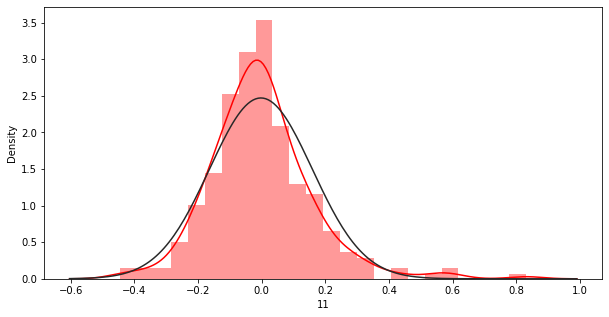

In [74]:
plt.figure(figsize=(10,5))
sns.distplot(error1,fit=norm,color="red")

# Result:-
* We clearly seen that Random Forest regressor is gives us best accuracy and gives minimum error for this data random Forest is Best Fitted algorithm.

# Check the error of two algorithms.

C:\Users\shita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


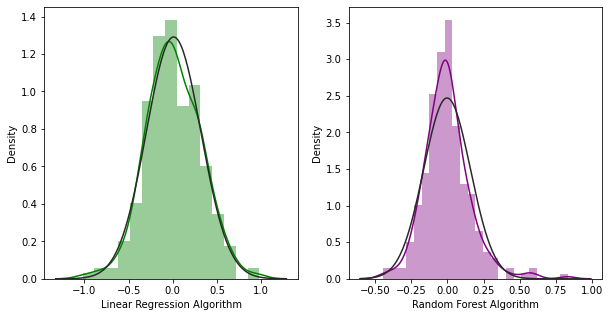

In [75]:
plt.figure(figsize=(10,5))
plt.title("Distribution of errors of this two algorithm.")
plt.subplot(1,2,1)
sns.distplot(error,fit=norm,color="green")
plt.xlabel("Linear Regression Algorithm")
plt.subplot(1,2,2)
sns.distplot(error1,fit=norm,color="purple")
plt.xlabel("Random Forest Algorithm")
plt.show()